In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load the data
df = pd.read_csv('rt_iot2022.csv')
df.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

In [4]:
df.describe()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,7.035683e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,7.415634e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,1.490871e+02,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,4.934475e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,1.048576e+06,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,65535.000000,65389.000000,21728.335580,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,2.097152e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


In [5]:
print(f"The combined dataset contains {df.shape[0]} instances and {df.shape[1]} features.")

The combined dataset contains 123117 instances and 84 features.


In [6]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"The dataset contains {missing_values} missing values.")

The dataset contains 0 missing values.


In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"The dataset contains {duplicates} duplicate rows.")

The dataset contains 5195 duplicate rows.


In [8]:
# remove duplicates
df = df.drop_duplicates()
# Check the final shape of the DataFrame
print(
    f"After cleaning, the dataset contains {df.shape[0]} instances and {df.shape[1]} features."
)

After cleaning, the dataset contains 117922 instances and 84 features.


In [9]:
# Count the occurrences of each class label
class_dist = df["Attack_type"].value_counts()
print("Class label counts:")
print(class_dist)

Class label counts:
Attack_type
DOS_SYN_Hping                 90089
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


In [60]:
y = df['Attack_type'];

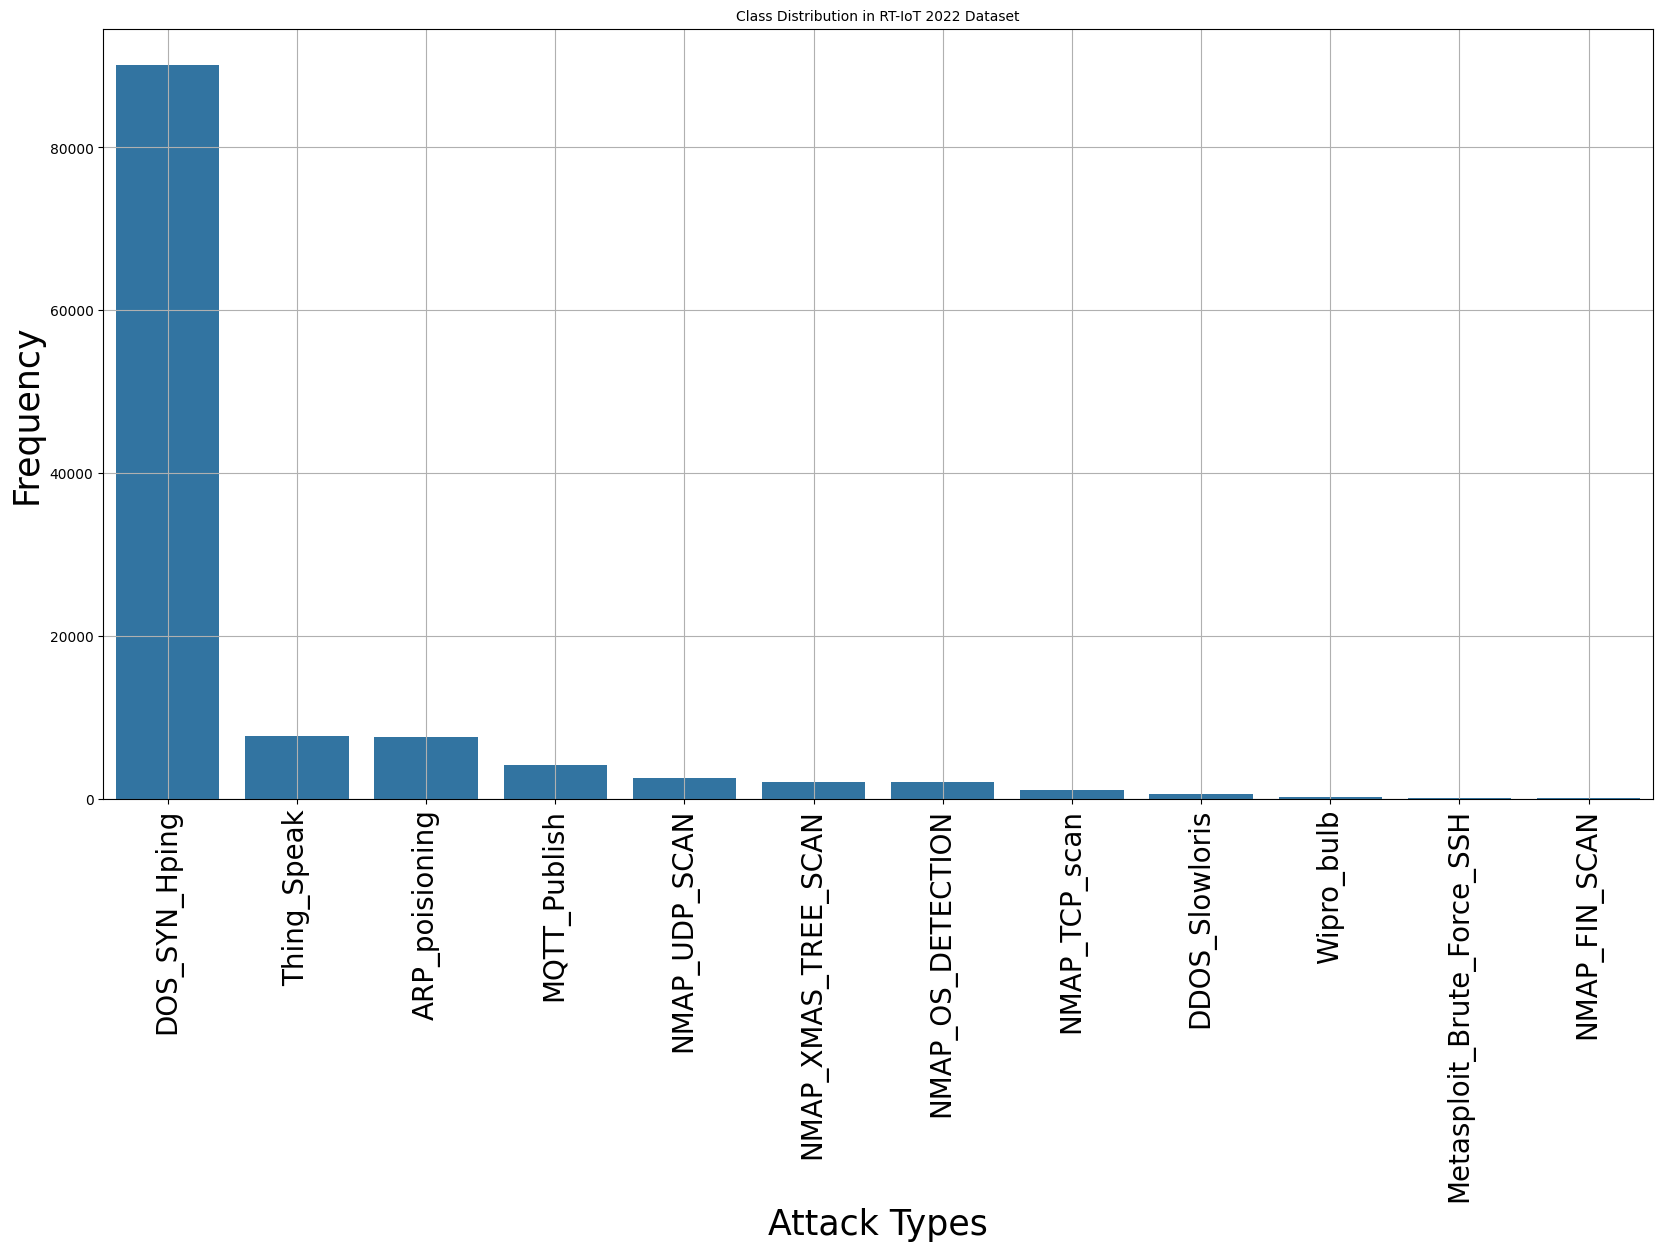

In [61]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Generate the barplot
sns.barplot(x=class_dist.index, y=class_dist.values, linewidth=2)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=20)

# Set labels and title with increased font size
plt.xlabel('Attack Types', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title('Class Distribution in RT-IoT 2022 Dataset', fontsize=10)

# Adding grid
plt.grid(True)

# Show the plot
plt.show()

In [62]:
majority_class_count = class_dist.max()
minority_class_count = class_dist.min()
imbalance_ratio = majority_class_count / minority_class_count;
print(f"Imbalance Ratio: {imbalance_ratio:.2f}");

Imbalance Ratio: 3217.46


In [63]:
# Count the occurrences of each class label
class_counts = df['Attack_type'].value_counts()

# Calculate the percentages
total = class_counts.sum()
percent_total = class_counts / total * 100
percent_majority = class_counts / class_counts['DOS_SYN_Hping'] * 100

# Create a DataFrame for the table
table = pd.DataFrame({
    'Normal / Attack Labels': class_counts.index,
    'Number of Instances': class_counts.values,
    '% of Prevalence w.r.t. the Majority Class': percent_majority.values,
    '% of Prevalence w.r.t. the Total Instances': percent_total.values
})

# Add a column for the index
table.reset_index(inplace=True)
table.rename(columns={'index': 'Sl No'}, inplace=True)

# Display the table
print(table)

    Sl No      Normal / Attack Labels  Number of Instances  \
0       0               DOS_SYN_Hping                90089   
1       1                 Thing_Speak                 7654   
2       2              ARP_poisioning                 7625   
3       3                MQTT_Publish                 4142   
4       4               NMAP_UDP_SCAN                 2584   
5       5         NMAP_XMAS_TREE_SCAN                 2010   
6       6           NMAP_OS_DETECTION                 2000   
7       7               NMAP_TCP_scan                 1002   
8       8              DDOS_Slowloris                  533   
9       9                  Wipro_bulb                  219   
10     10  Metasploit_Brute_Force_SSH                   36   
11     11               NMAP_FIN_SCAN                   28   

    % of Prevalence w.r.t. the Majority Class  \
0                                  100.000000   
1                                    8.496043   
2                                    8.463852 

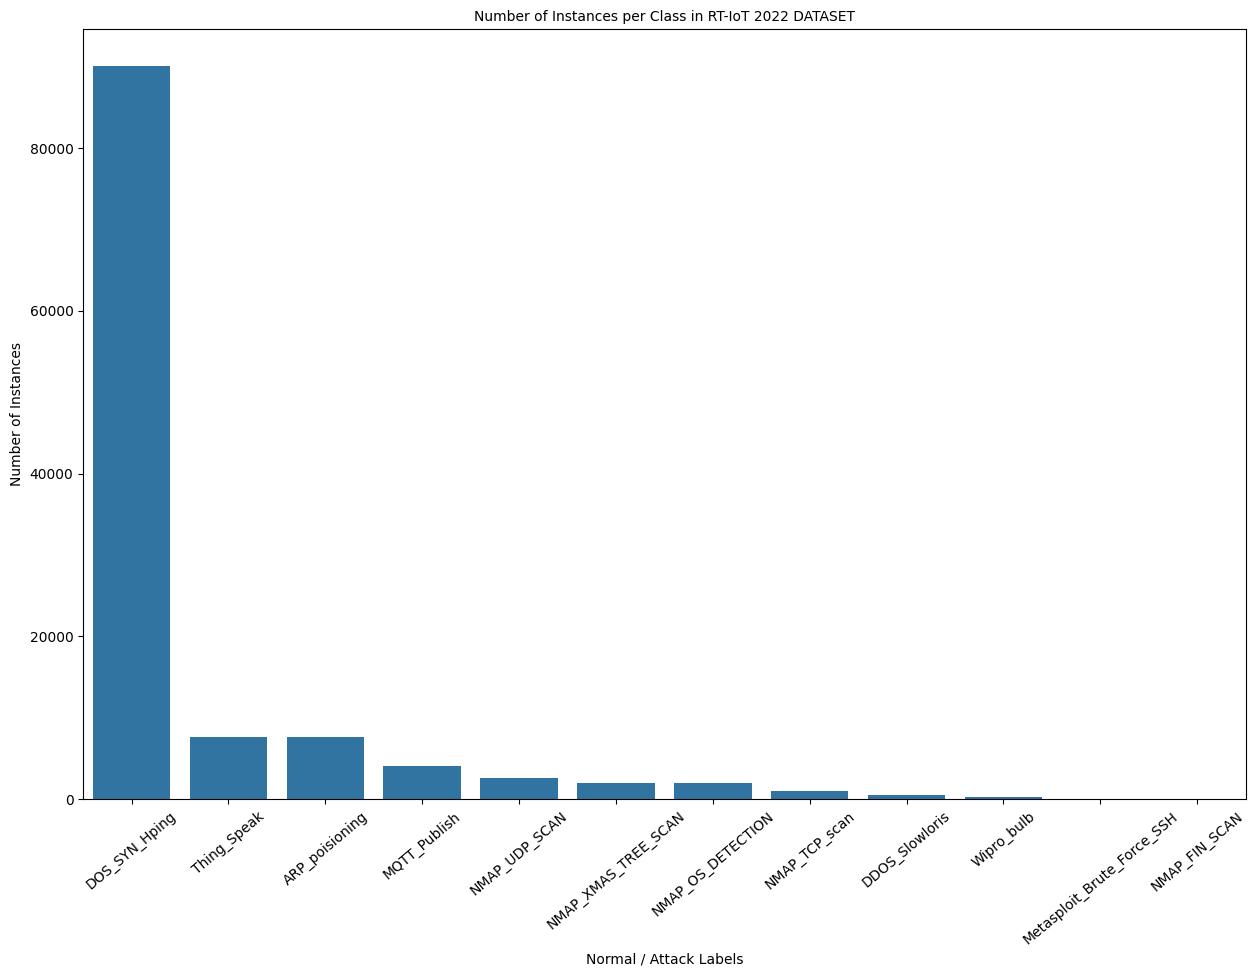

In [64]:
# Create a bar plot for the number of instances per class
plt.figure(figsize=(15, 10))
sns.barplot(x='Normal / Attack Labels', y='Number of Instances', data=table)
plt.xticks(rotation=40)
plt.title('Number of Instances per Class in RT-IoT 2022 DATASET', fontsize=10)
plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_7980\2047874804.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


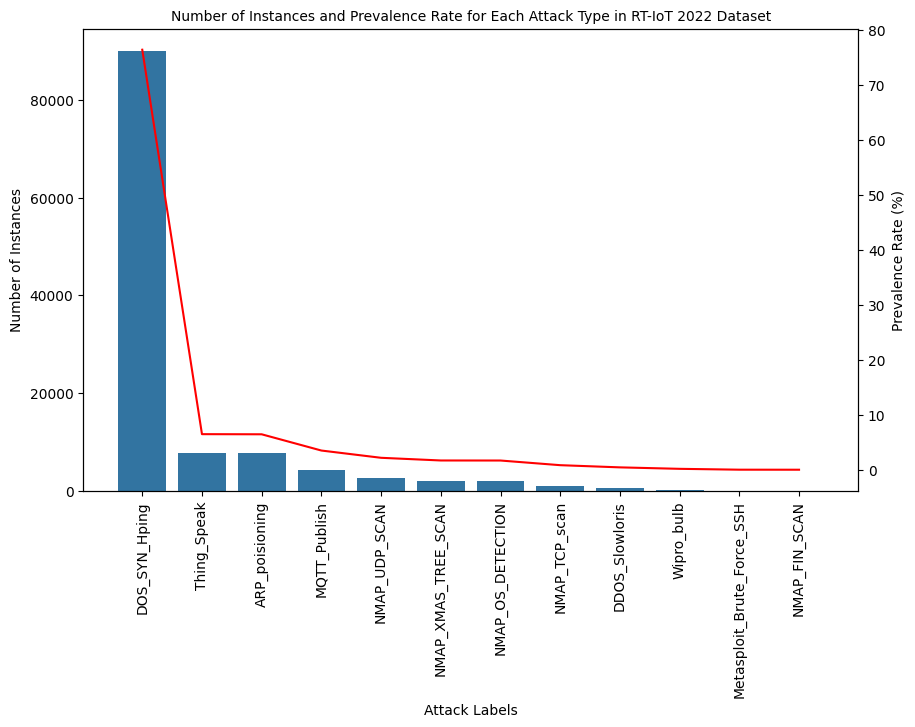

In [65]:
from matplotlib.ticker import FuncFormatter

def to_plain(x, pos):
    # Format in plain number, not scientific notation
    return '{:.0f}'.format(x)

# Apply this formatter to the y-axis of your plot
formatter = FuncFormatter(to_plain)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Apply formatter to the y-axis
ax1.yaxis.set_major_formatter(formatter)

sns.barplot(x='Normal / Attack Labels', y='Number of Instances', data=table, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()

# Apply formatter to the secondary y-axis
ax2.yaxis.set_major_formatter(formatter)

sns.lineplot(x='Normal / Attack Labels', y='% of Prevalence w.r.t. the Total Instances', data=table, ax=ax2, color='r')

ax1.set_xlabel('Attack Labels')
ax1.set_ylabel('Number of Instances')
ax2.set_ylabel('Prevalence Rate (%)')
plt.title('Number of Instances and Prevalence Rate for Each Attack Type in RT-IoT 2022 Dataset', fontsize=10)

plt.show()


In [66]:
unique_labels = df['Attack_type'].unique();
print(unique_labels);

['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']


In [67]:
df.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

In [68]:
# Preprocess the data
X = df.drop(["Attack_type"], axis=1)
y = df["Attack_type"]

In [69]:
y.info()

<class 'pandas.core.series.Series'>
Index: 117922 entries, 0 to 123116
Series name: Attack_type
Non-Null Count   Dtype 
--------------   ----- 
117922 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [70]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=["proto", "service"])
# Initialize the scaler
scaler = StandardScaler()

# Scale the encoded data
X_scaled = scaler.fit_transform(X_encoded)

In [71]:
# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [72]:
X_scaled.shape, y_encoded.shape

((117922, 94), (117922,))

In [73]:
# Fit the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y_encoded)

RandomForestClassifier(random_state=42)

(94,)


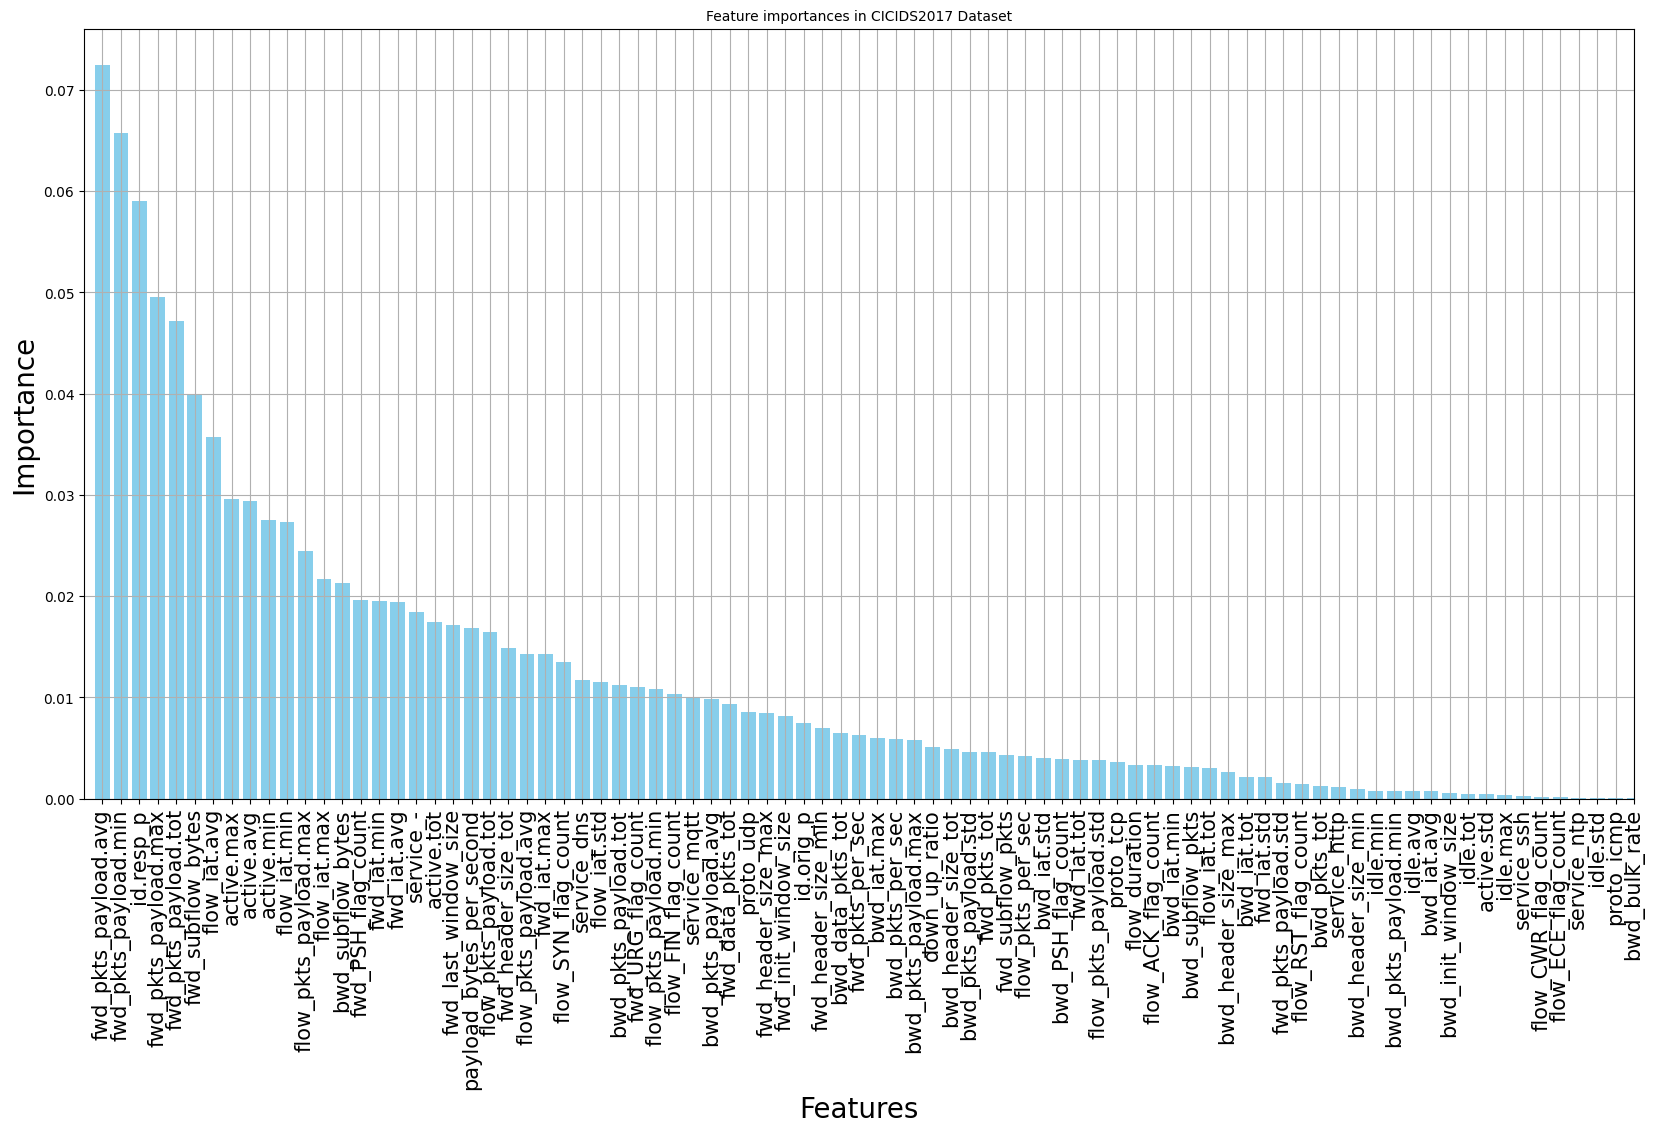

In [74]:
# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances.shape)

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Generate the barplot
plt.bar(
    range(X_scaled.shape[1]),
    importances[indices],
    align="center",
    color="skyblue",
    linewidth=2,
)

# Set labels and title with increased font size
plt.xticks(
    range(X_encoded.shape[1]), X_encoded.columns[indices], rotation=90, fontsize=15
)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Importance', fontsize=20)
plt.title('Feature importances in CICIDS2017 Dataset', fontsize=10)

# Set x and y axis limits
plt.xlim([-1, X.shape[1]])

# Adding grid
plt.grid(True)

# Show the plot
plt.show()

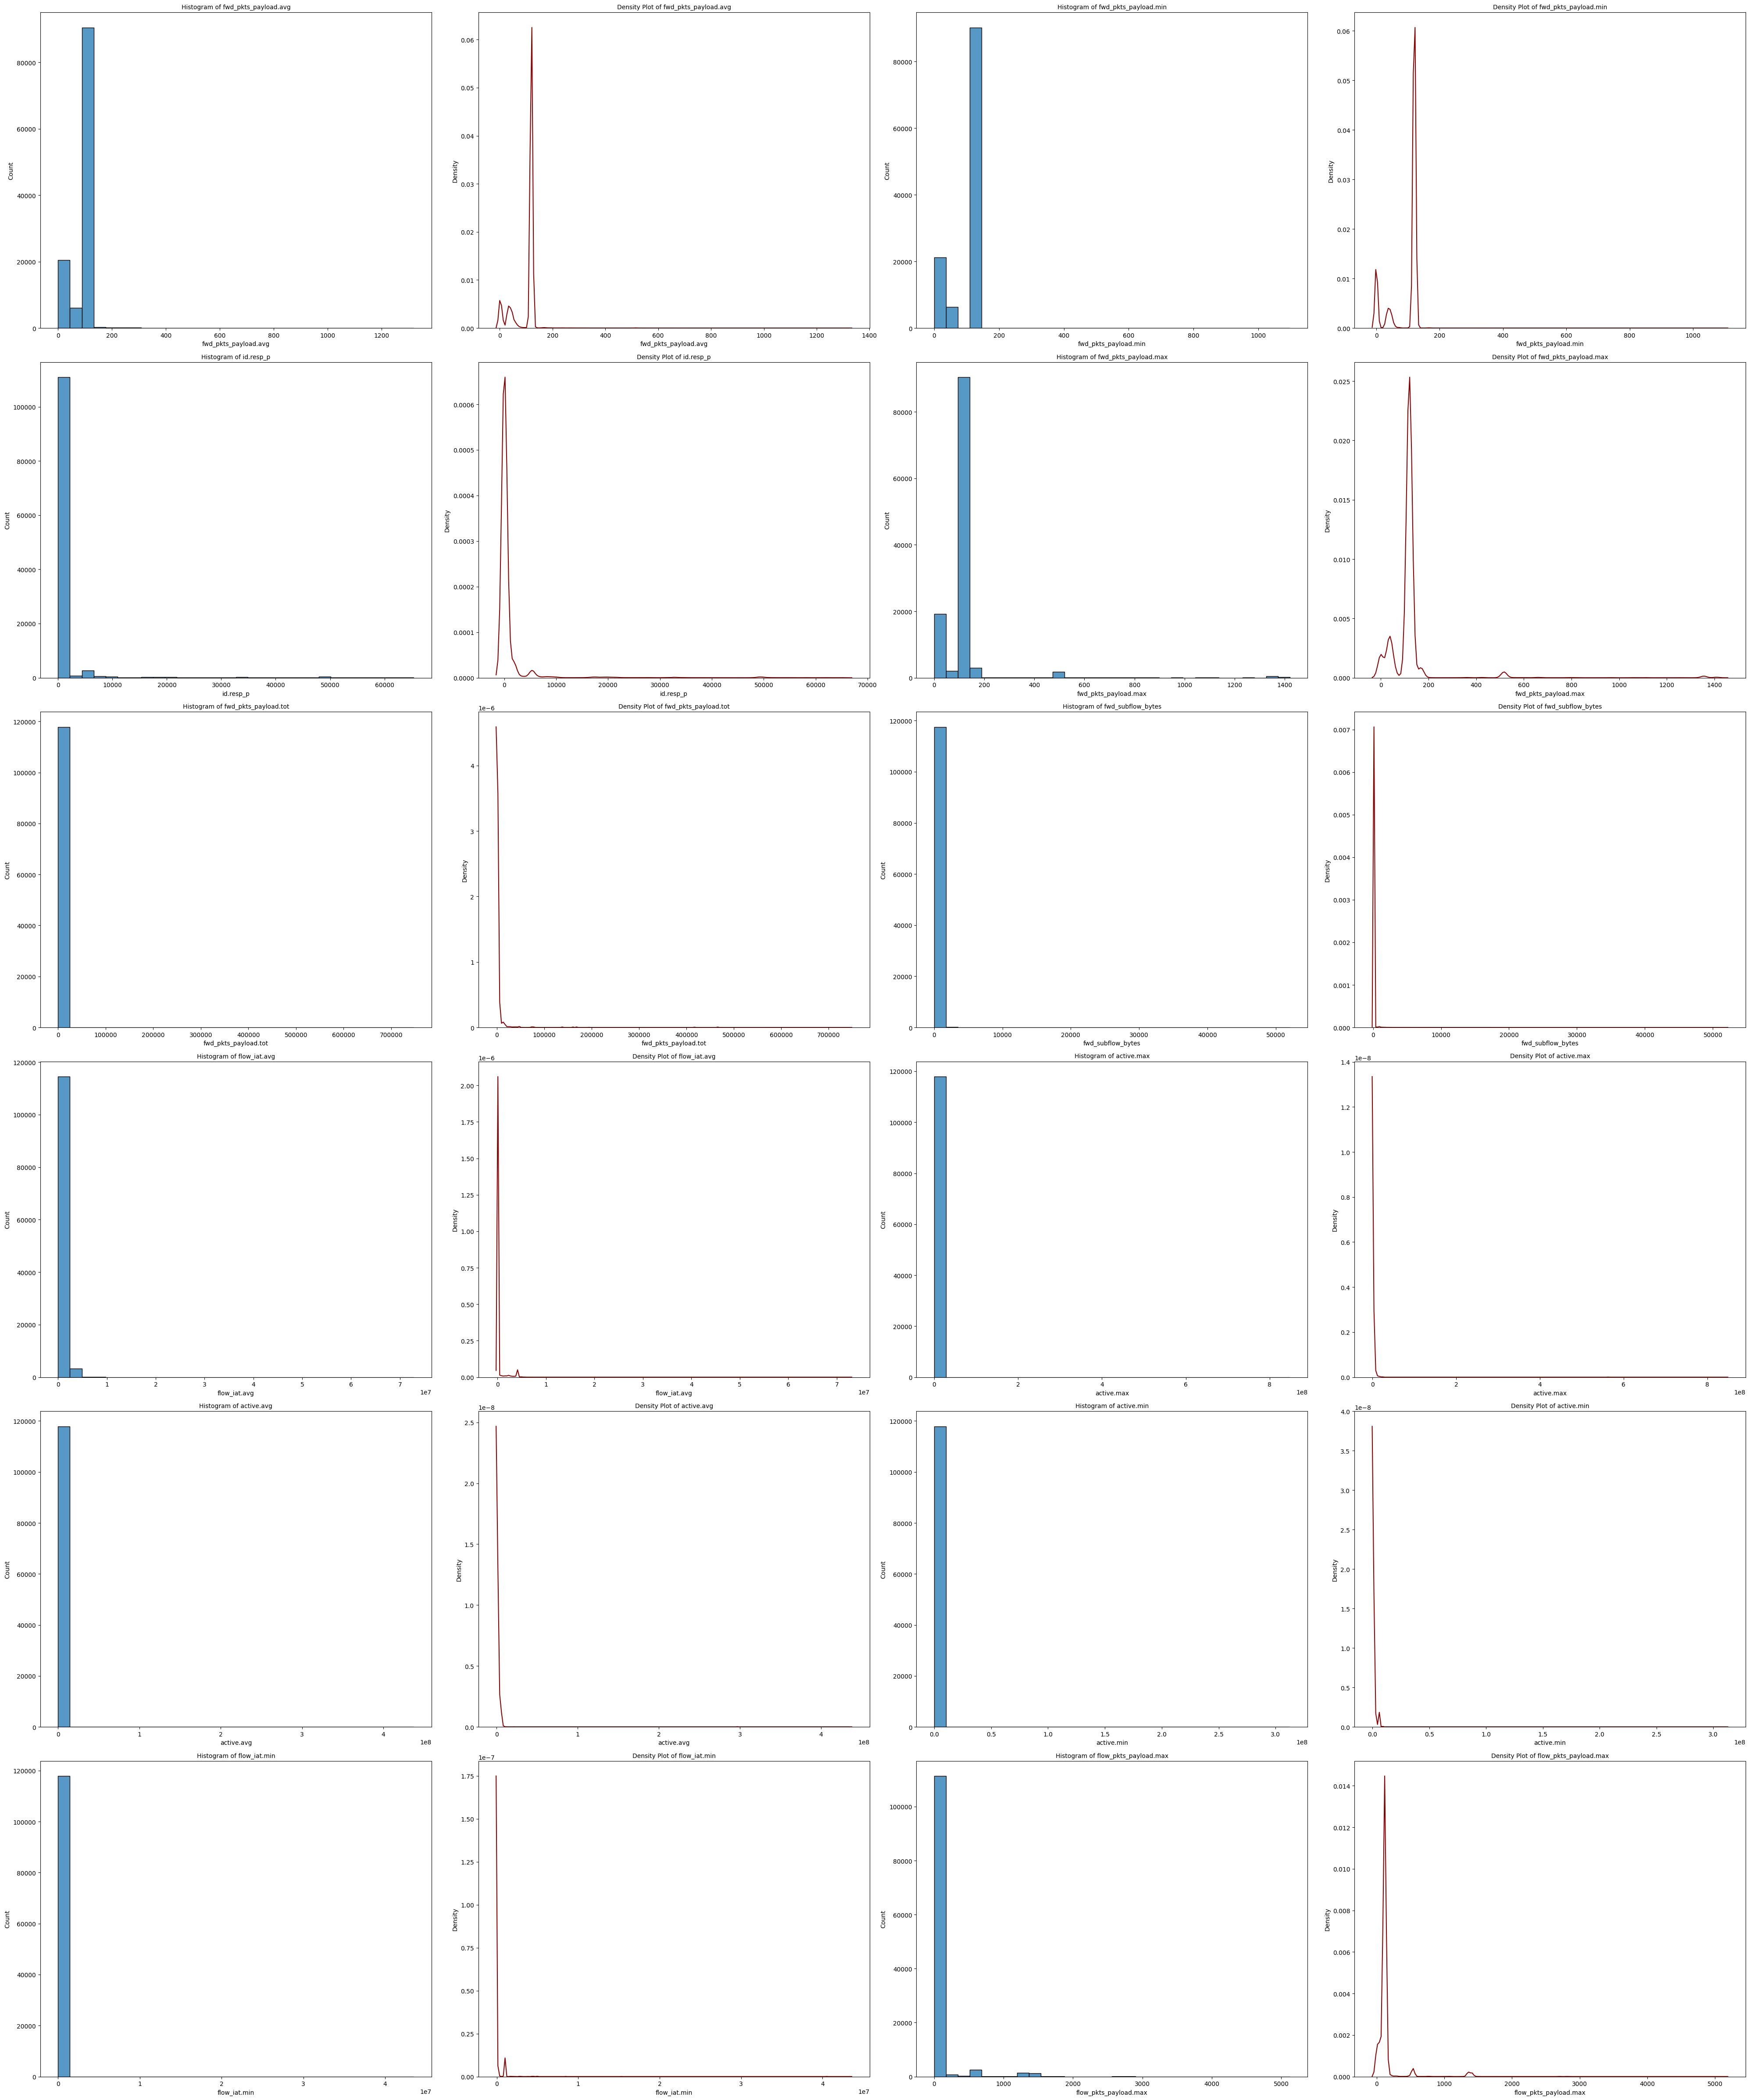

In [75]:
import math

# Get feature names
feature_names = X_encoded.columns

# Get sorted indices of feature importances
sorted_indices = np.argsort(importances)[::-1]

# Get top 10 feature names
top_10_features = feature_names[sorted_indices[:12]]

# Adjust the features variable
features = top_10_features

# Define the number of columns and rows for the plot. We multiply the number of rows by 2 because we want to display 2 plots (histogram and density) for each feature.
n_cols = 4
n_rows = math.ceil(len(features) * 2 / n_cols)

# Set the figure size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 8 * n_rows))

# Flatten the axes
axs = axs.flatten()

# Enumerate over features and plot histogram and density plot for each one
for i, feature in enumerate(features):
    # Plot histogram
    sns.histplot(X_encoded[feature], bins=30, kde=False, ax=axs[2 * i])
    axs[2*i].set_title(f'Histogram of {feature}', fontsize=10)

    # Plot density
    sns.kdeplot(X_encoded[feature], color="darkred", ax=axs[2 * i + 1])
    axs[2*i+1].set_title(f'Density Plot of {feature}', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

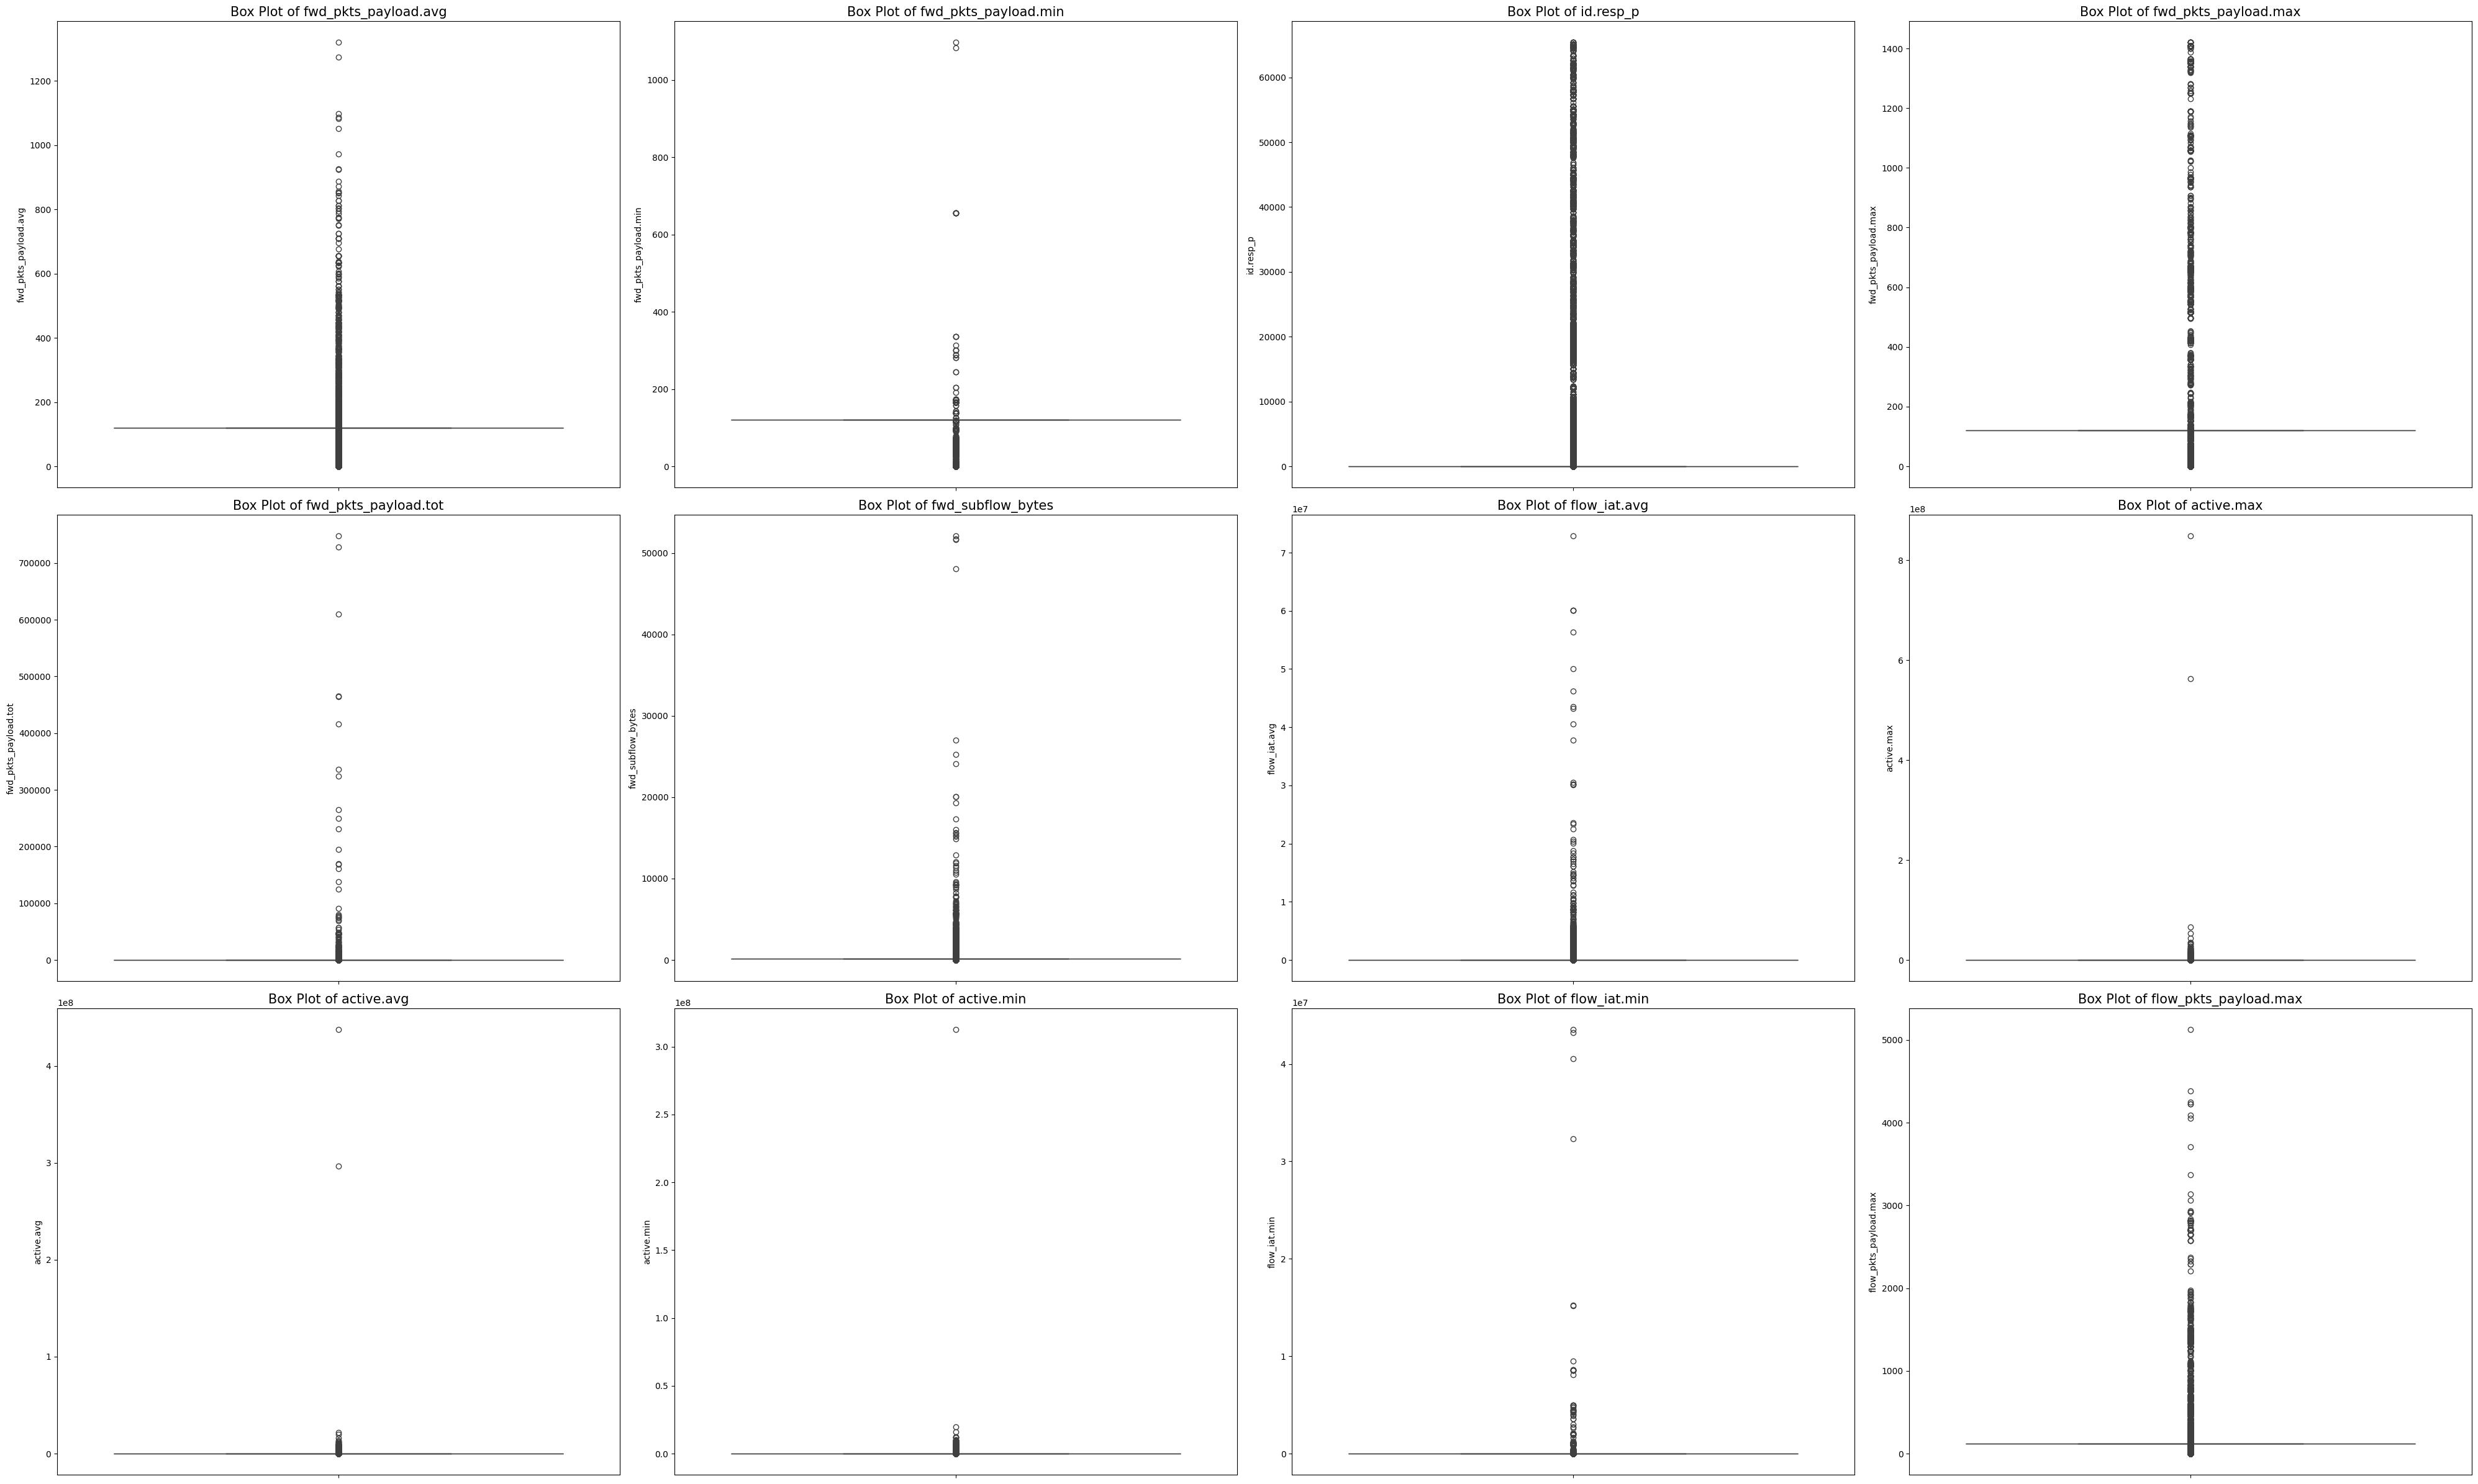

In [76]:
# Get feature names
feature_names = X_encoded.columns

# Get sorted indices of feature importances
sorted_indices = np.argsort(importances)[::-1]

# Get top 10 feature names
top_10_features = feature_names[sorted_indices[:12]]

# Adjust the features variable
features = top_10_features

# Define the number of columns and rows for the plot
n_cols = 4
n_rows = math.ceil(len(features) / n_cols)

# Set the figure size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 8 * n_rows))

# Flatten the axes
axs = axs.flatten()

for i, feature in enumerate(features):
    # Plot boxplot
    sns.boxplot(y=X_encoded[feature], ax=axs[i])
    axs[i].set_title(f'Box Plot of {feature}', fontsize=15)

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()